# Import des modules nécessaires

## Modules externes

In [1]:
# pour faire de beaux graphiques
%matplotlib inline
import matplotlib.pyplot as plt

# pour gérer les tables en Python
import pandas as pd

# pour faire d'encore plus beaux graphiques
import seaborn as sns

## Modules internes

In [2]:
from db import Etape, Ligne, Session, Trajet

# Récupérer les données (écarts, déjà)

In [3]:
session = Session()

ecarts = [req[0] for req in session.query(Etape.ecart).all()]

session.close()

In [4]:
print(ecarts)

[818, 18, 0, 107, -129, 157, 142, -11, 30]


# Analyse

Je vous donne quelques pistes. L'idée est d'essayer de trouver un indicateurs qui vous semble refléter la qualité de l'exploitation du réseau à cet instant, à partir de tous les écarts des bus.

Pour plus de graphiques et d'analyses statistiques, je vous conseille d'aller voir [le site de `seaborn`](https://seaborn.pydata.org/examples/).

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


[Text(0,0.5,'nombre de véhicules'),
 Text(0.5,0,'retard en secondes'),
 Text(0.5,1,'Quels retards sur le réseau Irigo ?')]

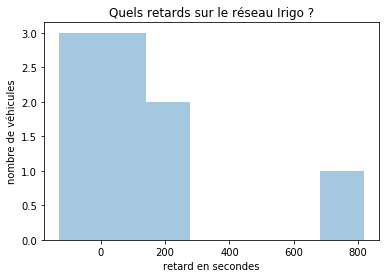

In [5]:
ax = sns.distplot(ecarts, kde=False)

ax.set(
    title="Quels retards sur le réseau Irigo ?",
    xlabel='retard en secondes',
    ylabel='nombre de véhicules'
)

Maintenant essayez de l'afficher en minutes.

Puis, réfléchissez à quel nombre pourrait refléter, en résumé, la situation : le max des retards ? la moyenne des retards ? la moyenne des valeurs absolues des retards ?

# Récupérer toutes les données

In [6]:
# Voici comment on fait un join
query = session.query(Etape.ecart, Trajet.id_ligne).select_from(Etape).join(Trajet)

pd.read_sql_query(query.statement, query.session.bind)

,ecart,id_ligne
0,818,268435472
1,18,268435471
2,0,268435471
3,107,268435472
4,-129,268435474
5,157,268435472
6,142,268435473
7,-11,268435471
8,30,268435471


Et si je veux relier ça à la ligne elle-même ? J'ai en quelque sorte besoin de jointures en chaine Etape <-> Trajet <-> Ligne. C'est pas plus compliqué !

In [13]:
# Voici comment on fait un join
query = session.query(Etape.ecart, Ligne.nom_ligne).select_from(Etape).join(Trajet).join(Ligne)

df = pd.read_sql_query(query.statement, query.session.bind)

df

,ecart,nom_ligne
0,818,SOIR LAC MAINE <> CITE CHABADA
1,18,ARDENNE <> ROSERAIE
2,0,ARDENNE <> ROSERAIE
3,107,SOIR LAC MAINE <> CITE CHABADA
4,-129,SOIR MAIRIE PONTS CE <> AVRILLE
5,157,SOIR LAC MAINE <> CITE CHABADA
6,142,SOIR TRELAZE <> LORRAINE
7,-11,ARDENNE <> ROSERAIE
8,30,ARDENNE <> ROSERAIE


In [14]:
df.pivot_table(index="nom_ligne", values="ecart", aggfunc='sum')

,ecart
nom_ligne,
ARDENNE <> ROSERAIE,37
SOIR LAC MAINE <> CITE CHABADA,1082
SOIR MAIRIE PONTS CE <> AVRILLE,-129
SOIR TRELAZE <> LORRAINE,142
